# Neural Networks

The task we need to accomplish consists in recognizing handwritten digits (0 to 9).

We have already experimented with this challenge with Regularized Logistic Regression getting a global model accuracy of around 73%. We are going to implement a NN end to end and see if we can beat the previous result. We will actually follow two steps:

1. Implement Forward Progragation and run a NN with pre-trained weights
2. Implement the wholle algorithm, hence Forward Propagation (defining the relation between predictors and output) plus Back Propagation (which will enable us to learn the weights defined in the first step)

### NN Representation: Forward Propagation

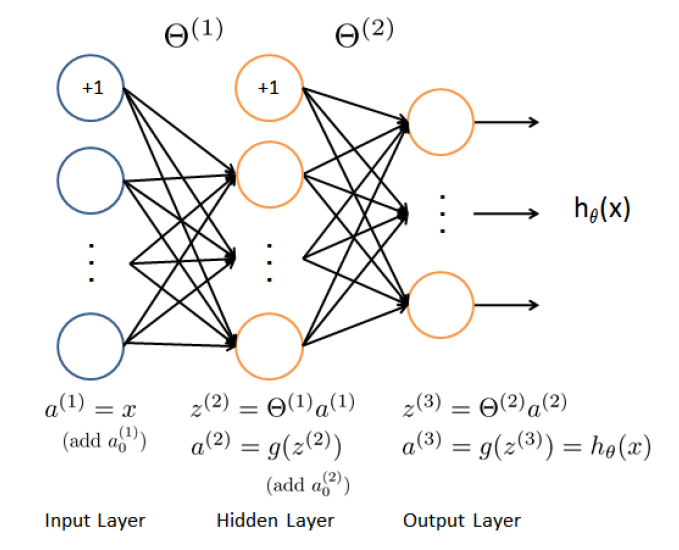

In [5]:
from IPython.display import Image
Image("C:\\Users\\pochetti\\Desktop\\Fra\\Francesco\\NN.png")

In [6]:
import scipy.io
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

mat = scipy.io.loadmat('C:\\Users\\pochetti\Machine_Learning\\mlclass-ex3-005\\mlclass-ex3\ex3data1.mat')
X = mat['X']
y = mat['y']

## Functions 

In [7]:
def displayData(X):
    fig = plt.figure(figsize=(8,8))
    plt.title('100 Random Images from the data set')
    indexes = random.sample(range(1, X.shape[0]), 100)
    images = X[indexes,:]
    for i in np.arange(10):
        for j in np.arange(10):
            ax = fig.add_subplot(10, 10, (10*j+i)+1)
            ax.matshow(images[10*j+i,:].reshape(20,20), cmap = 'gray')
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def forwardPropagation(InputHidden, HiddenOutput, X):
    # X should be passed with the intercept already added
    hidden =  X.dot(InputHidden.T) # <5000*401><401*25> = <5000*25>
    hidden =  np.c_[np.ones(hidden.shape[0]), hidden] # <5000*26> adding intercept
    output = hidden.dot(HiddenOutput.T) # <5000*26><26*10> = <5000*10>
    
    return output

### Visualizing the data

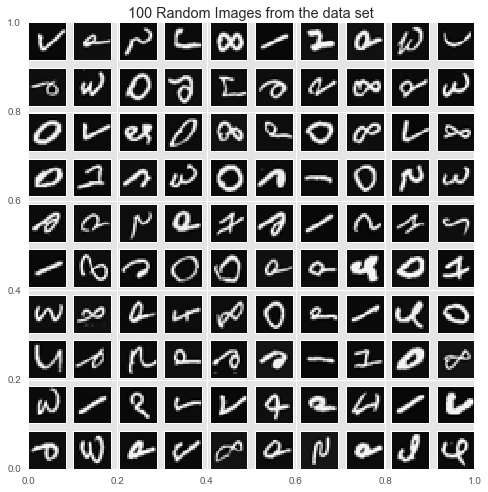

In [8]:
displayData(X)

### Running a pre-trained NN 

In [9]:
mat = scipy.io.loadmat('C:\\Users\\pochetti\Machine_Learning\\mlclass-ex3-005\\mlclass-ex3\ex3data1.mat')
X = mat['X']
y = mat['y']

weights = scipy.io.loadmat('C:\\Users\\pochetti\Machine_Learning\\mlclass-ex3-005\\mlclass-ex3\ex3weights.mat')
InputHidden = weights['Theta1']
HiddenOutput = weights['Theta2']

X =  np.c_[np.ones(X.shape[0]), X] # adding intercept to X

probabilities = forwardPropagation(InputHidden, HiddenOutput, X)

predictions = np.argmax(probabilities, axis=1) + 1

accuracy = (y == predictions.reshape(-1,1)).mean()*100

print('NN Accuracy: {0}%'.format(round(accuracy, 2)))

NN Accuracy: 69.62%
